# **Supermarket Sales Prediction**



# Sales forecasting is one of the most important things a company does. It fuels sales planning and is used throughout an enterprise for staffing and budgeting. Despite its importance, many organizations use outmoded practices that produce bad forecasts

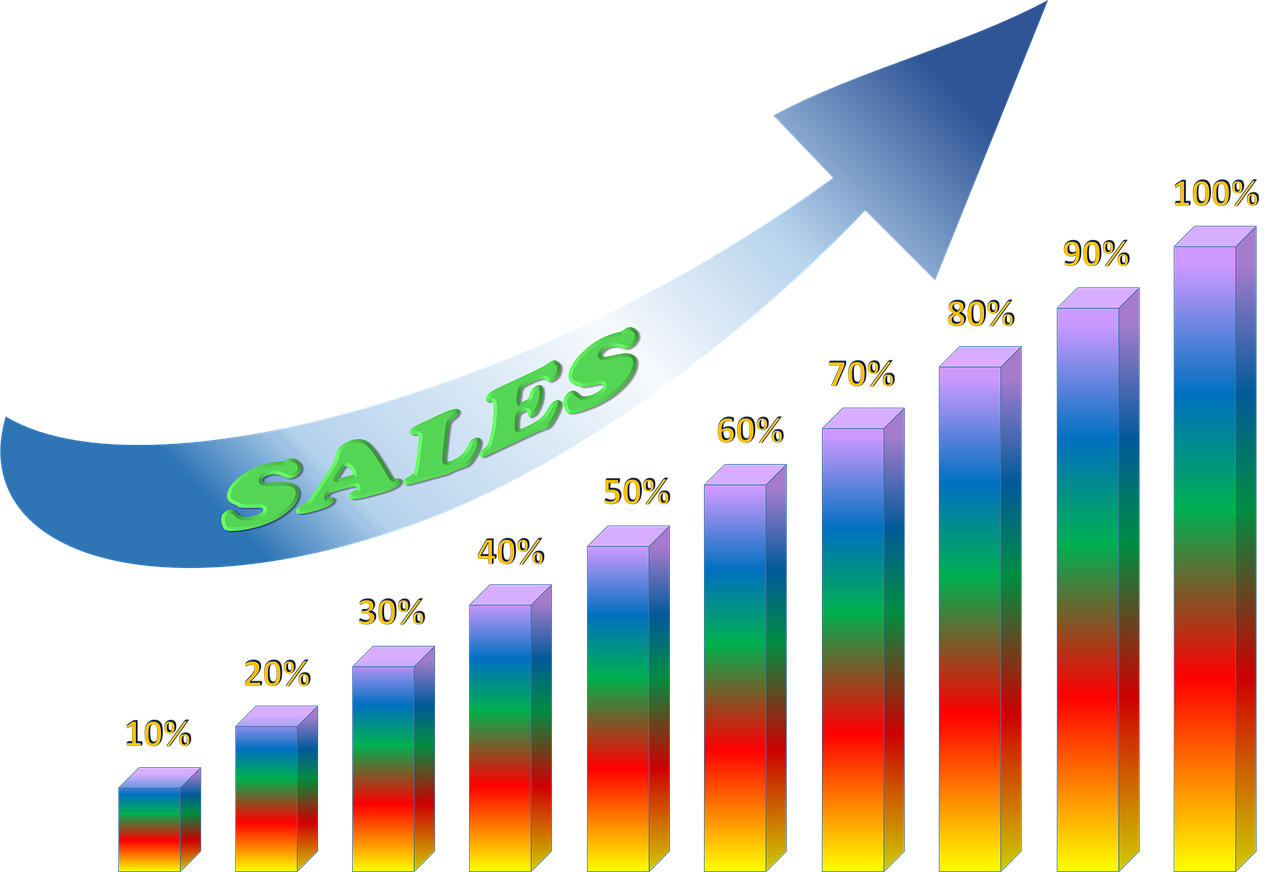

# **IMPORTING THE LIBRARIES**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime

# **LOADING THE DATASET**

In [4]:
data = pd.read_excel("/content/Supermartket Sales.xlsx")

In [ ]:
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4


# **Exploratory Data Analysis**

**HISTOGRAM**

**A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.**

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

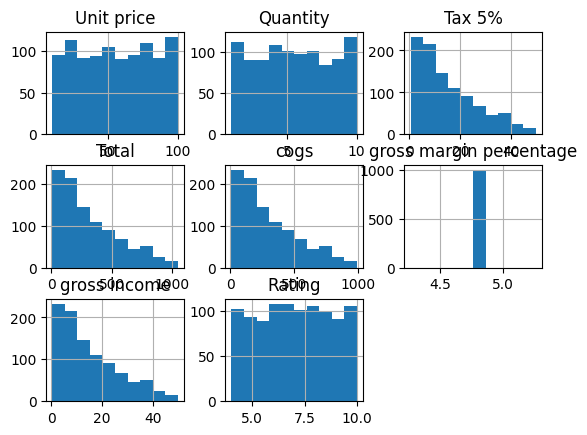

In [10]:
data.hist()

**HEATMAP**

**A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.**


<Axes: >

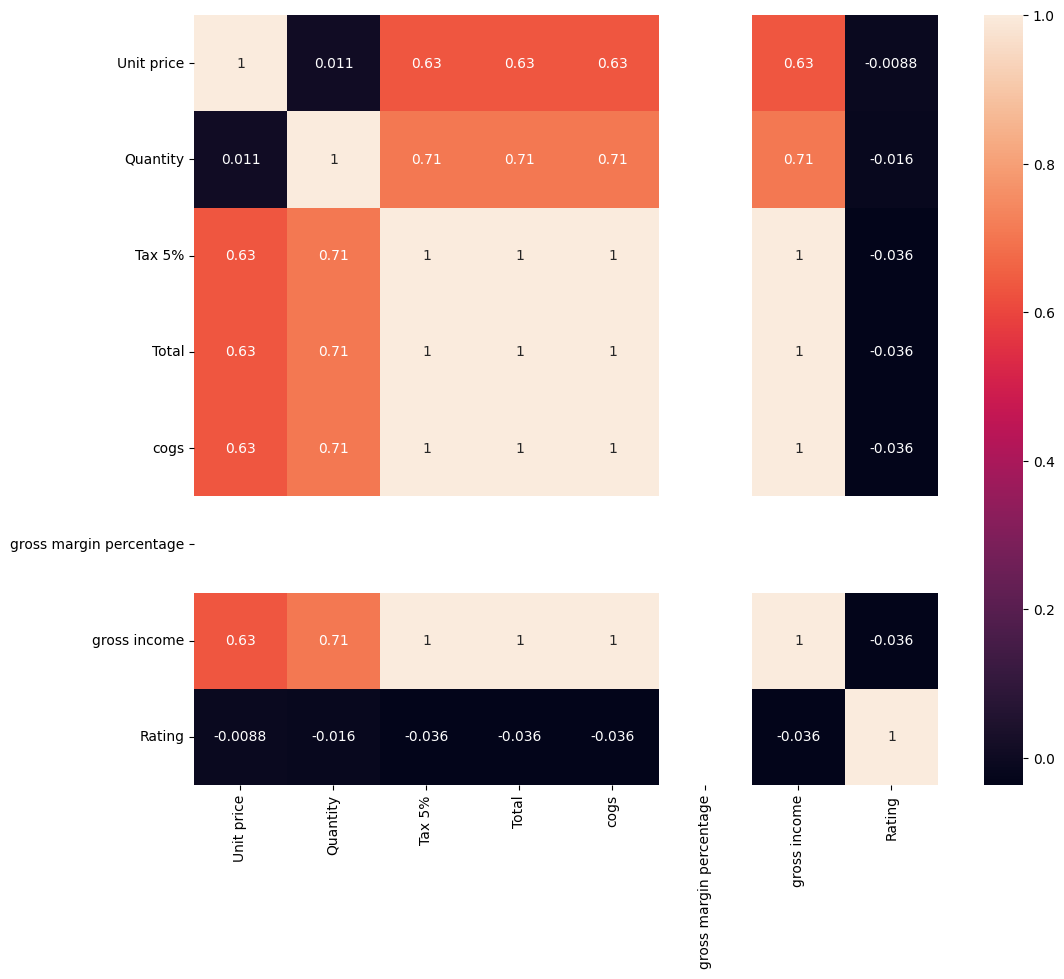

In [11]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot =True)

# **Model**

In [24]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


In [20]:
data['Date']=pd.to_datetime(data['Date']).dt.strftime('%m/%d/%Y')
data=data[0:20]

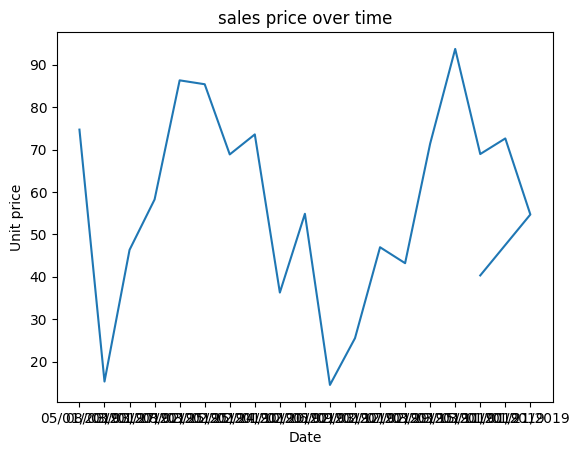

In [21]:
plt.plot(data['Date'], data["Unit price"][0:20])
plt.title("sales price over time")
plt.xlabel("Date")
plt.ylabel("Unit price")
plt.show()

In [26]:
train_data, test_data = data[0:int(len(data)*0.7)], data[int(len(data)*0.7):]
training_data = train_data['Unit price'].values
test_data = test_data['Unit price'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = sm.tsa.arima.ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 506.7362599854064


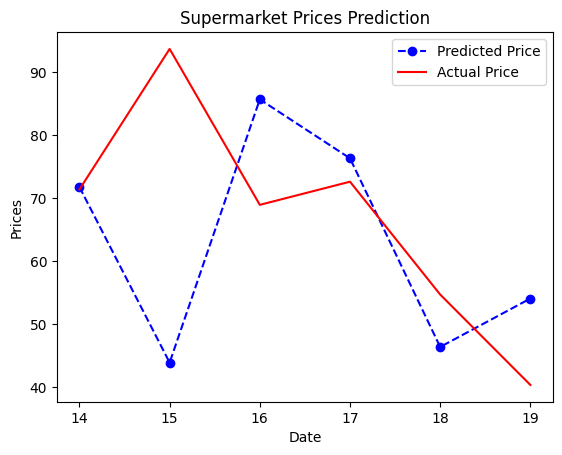

In [27]:
test_set_range = data[int(len(data)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Supermarket Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

# **Data Visualization**

Seaborn Library

Text(0.5, 1.0, 'Unit price per Date ')

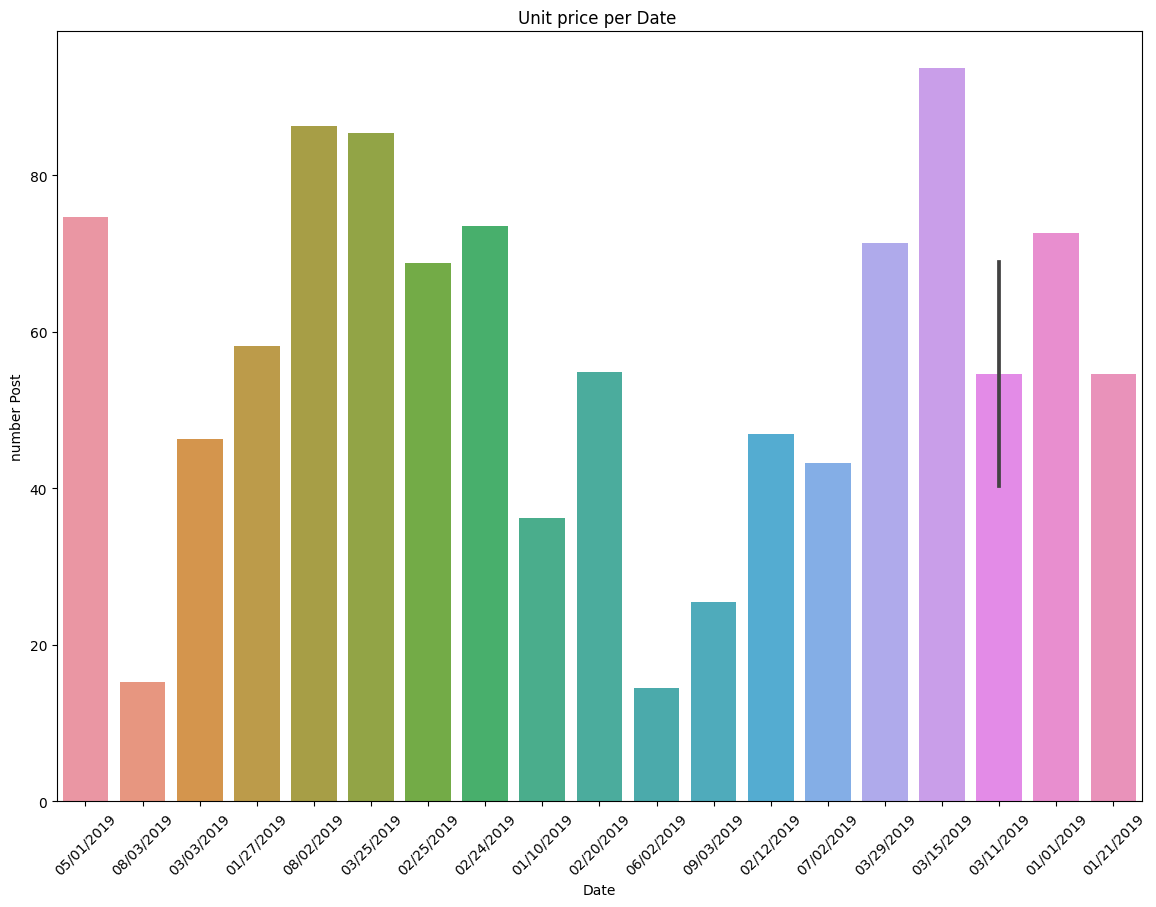

In [28]:
plt.figure(figsize=(14,10))
sns.barplot(x=data['Date'], y=data['Unit price'])
plt.xticks(rotation= 45)
plt.xlabel('Date')
plt.ylabel('number Post')
plt.title('Unit price per Date ')

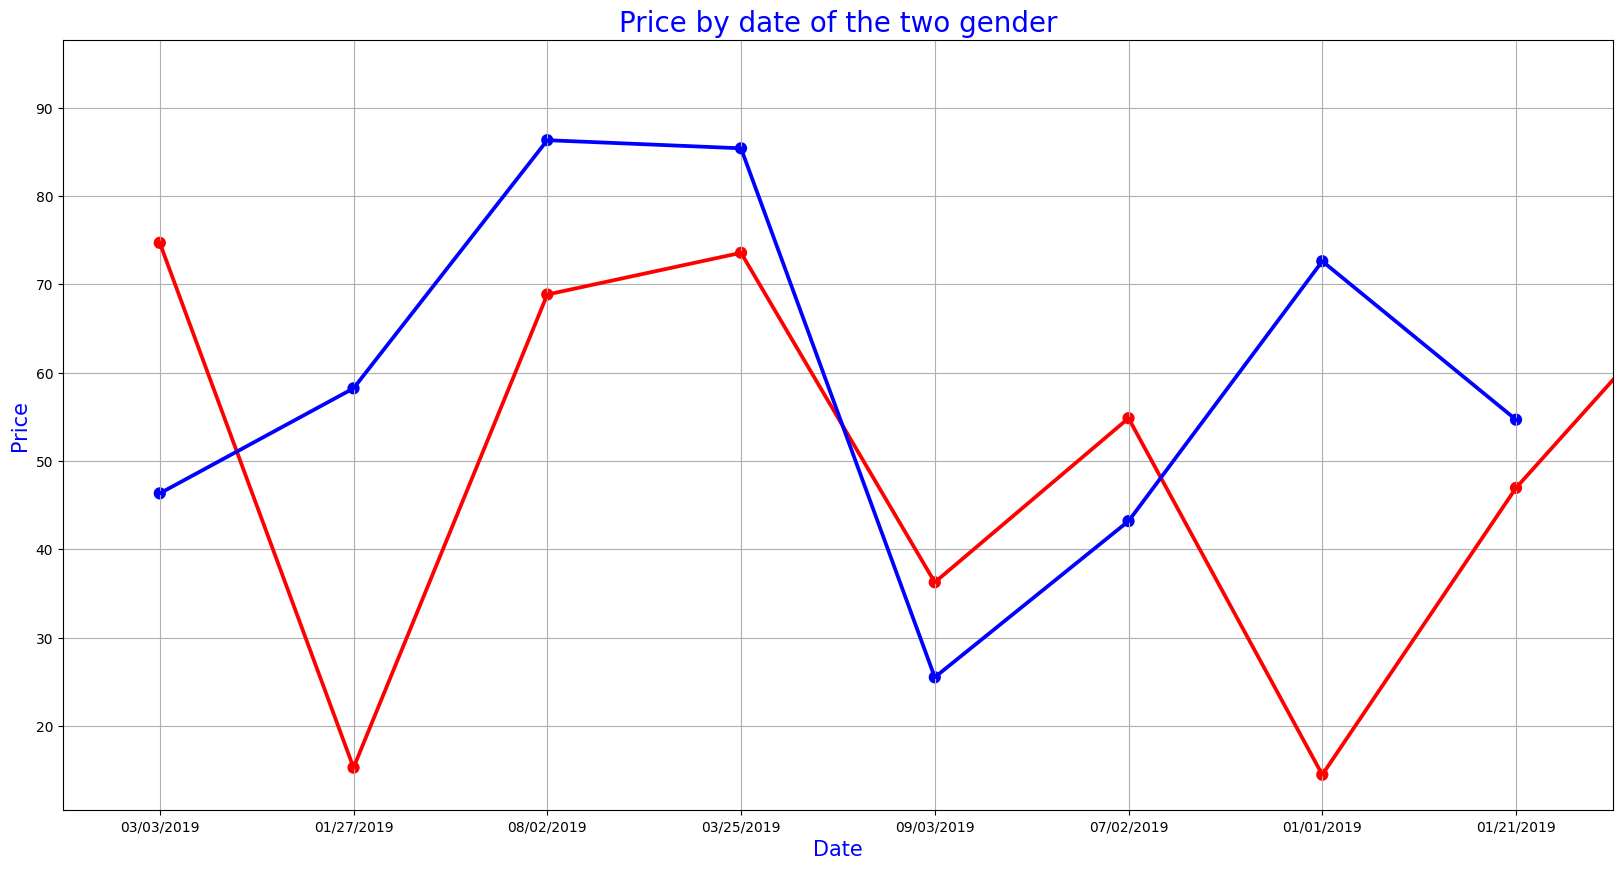

In [32]:
f,ax1 = plt.subplots(figsize =(20,10))
df= data.loc[data['Gender'] == 'Female']
dm= data.loc[data['Gender'] == 'Male']
sns.pointplot(x='Date',y='Unit price',data=df,color='red')
sns.pointplot(x='Date',y='Unit price',data=dm,color='blue')
plt.xlabel('Date',fontsize = 15,color='blue')
plt.ylabel('Price',fontsize = 15,color='blue')
plt.title('Price by date of the two gender',fontsize = 20,color='blue')
plt.grid()

Text(0.5, 1.0, 'Branch')

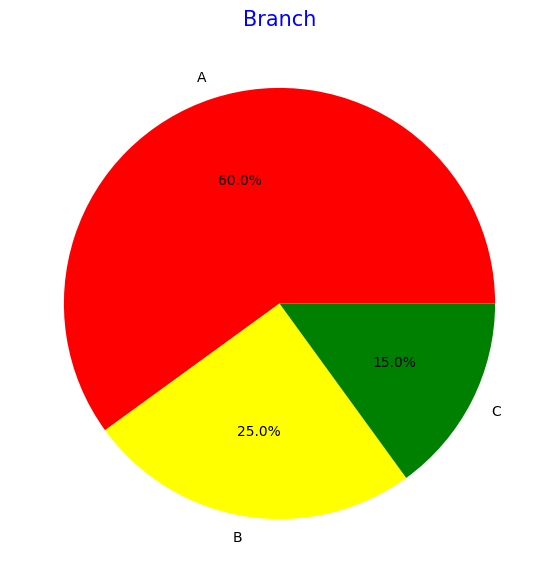

In [34]:
data.Branch.dropna(inplace = True)
labels = data.Branch.value_counts().index
colors = ['red','yellow','green']
explode = [0,0,0]
sizes = data.Branch.value_counts().values
plt.figure(figsize = (7,7))
explode
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Branch',color = 'blue',fontsize = 15)

Text(0.5, 1.0, '  branch distribution')

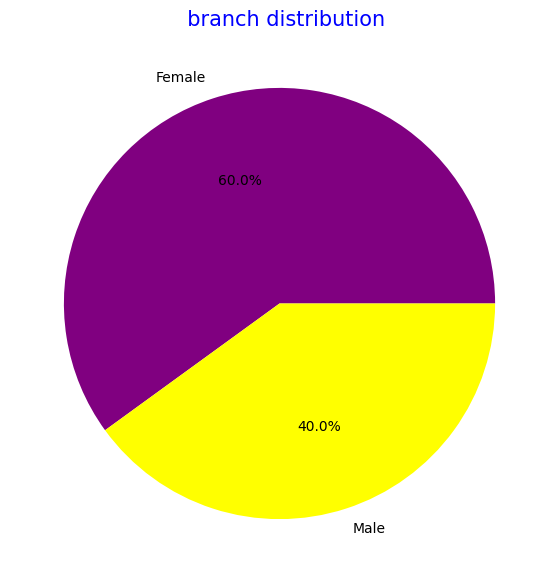

In [35]:
data.Gender.dropna(inplace = True)
labels = data.Gender.value_counts().index
colors = ['purple','yellow','green']
explode = [0,0]
sizes = data.Gender.value_counts().values
plt.figure(figsize = (7,7))
explode
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('  branch distribution',color = 'blue',fontsize = 15)

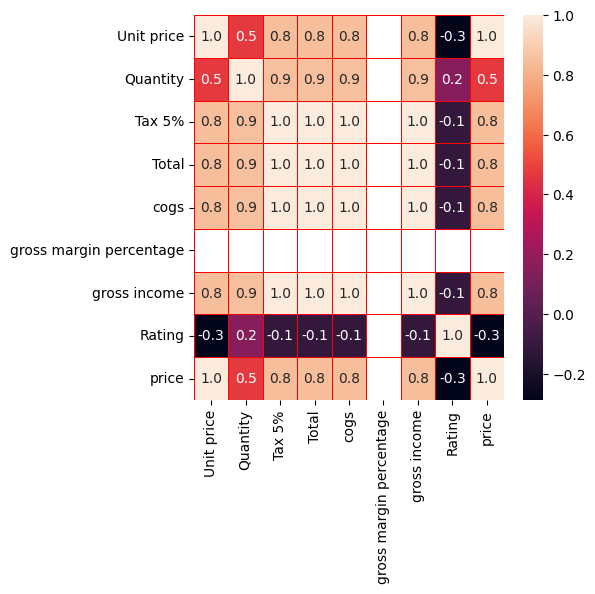

In [36]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()